In [90]:
import tempfile
import subprocess
from pathlib import Path


def text2image(
    text,
    font_name,
    output_file="./train",
    fonts_dir="./fonts/",
    unicharset_file="./Arabic.unicharset",
    char_spacing=0.25,
    width=900,
    height=480,
    degrade_image=True,
):
    Path(output_file).parent.mkdir(exist_ok=True, parents=True)
    with tempfile.NamedTemporaryFile("w", delete=False) as file:
        file.write(text)
    # https://digi.bib.uni-mannheim.de/tesseract/manuals/text2image.1.html
    out = subprocess.run(
        [
            "text2image",
            f"--font={font_name}",
            f"--fonts_dir={fonts_dir}",
            f"--unicharset_file={unicharset_file}",
            "--max_pages=1",
            "--strip_unrenderable_words",
            f"--degrade_image={str(bool(degrade_image)).lower()}",
            "--leading=32",
            f"--xsize={width}",
            f"--ysize={height}",
            f"--char_spacing={char_spacing}",
            "--exposure=0",
            f"--outputbase={output_file}",
            f"--text={file.name}",
        ]
    ).returncode
    Path(file.name).unlink()
    return out


def generate_images(image_path):
    image_path = Path(image_path)
    with open(image_path / "text.txt", encoding="utf-8") as file:
        text = file.read().split("\n")

    fonts = {
        "Naskh": "DecoType Naskh Extensions",
        "Ruqah": "Barada Reqa Medium",
        "Kufic": "HSAlBasimB",
        "Diwani": "Diwani Letter",
        "Thuluth": "A Thuluth",
    }

    for i, line in enumerate(text):
        for font, name in fonts.items():
            text2image(line, name, str(image_path / f"{font}/{i}"))


generate_images('./train/')

In [87]:
#ADD MORE TRAIN DATA

from pyarabic.normalize import strip_tashkeel 

textt = """
إنْ يكُنْ صَبرُ ذي الرّزيئَةِ
فَضْلا تكُنِ الأفضَلَ 
الأعَزّ الأجَلاّ أنتَ يا فوْقَ 
أنْ تُعَزّى عنِ الأحـبابِ 
فوْقَ الذي يُعزّيكَ
عَقْلا وَبألفاظِكَ 
اهْتَدَى فإذا عَزّاكَ قَالَ
الذي لَهُ قُلتَ قَبْلا قَدْ
بَلَوْتَ الخُطوبَ مُرّاً 
وَحُلْواً وَسَلَكتَ الأيّامَ
حَزْناً وَسَهْلا وَقَتَلْتَ 
الزّمانَ عِلْماً فَمَا
 يُغْـرِبُ قَوْلاً وَلا يُجَدِّدُ 
فِعْلا أجِدُ الحُزْنَ فيكَ 
حِفْظاً وَعَقْلاً وَأرَاهُ في
النّاسِ ذُعراً وجَهْلا لَكَ إلْفٌ يَجُرّهُ وَإذ
ا مَا كرُمَ الأصْلُ كان
للإلْفِ أصلا وَوَفَاءٌ
 نَبَتَّ فيهِ وَلَكِنْ لم يَزَلْ 
للوَفَاء أهْلُكَ أهْلا إنّ خَيرَ 
الدّمُوعِ عَوْناً لَدَمْعٌ بَعَثَتْهُ
رِعايَةٌ فاسْتَهَلاّ أينَ ذي 
 الرِّقّةُ التي لَكَ في الحَرْبِ 
إذا استُكرِهَ الحَديدُ
وَصَلاّ أينَ خَلّفْتَهَا غَداةَ 
لَقِيتَ الـرّومَ وَالهَامُ
بالصّوارِمِ تُفْلَى قاسَمَتْكَ 
المَنُونُ شَخْصَينِ جوْراً
جَعَلَ القِسْمُ نَفْسَهُ فيهِ عَدْلا فإذا قِسْتَ ما
أخَذْنَ بمَا غَا دَرْنَ سرّى
 عَنِ الفُؤادِ وَسَلّى 
وَتَيَقّنْتَ أنّ حَظّكَ أوْفَى 
وَتَبَيّنْتَ أنّ جَدّكَ أعْلَى
وَلَعَمْرِي لَقَدْ شَغَلْتَ
 المَنَايَا بالأعادي فكَيفَ
يَطلُبنَ شُغلا وَكَمِ انتَشْتَ
 بالسّيُوفِ منَ الدهـرِ
أسيراً وَبالنّوَالِ مُقِلاّ عَدّها نُصرَةً عَلَيْهِ
فَلَمّا صَالَ خَتْلاً رَآهُ 
أدرَكَ تَبْلا كَذَبَتْهُ ظُنُونُهُ،
أنْتَ تُبْليــهِ وَتَبْقى
 في نِعْمَةٍ لَيسَ تَبْلَى
خُذْ في البُكَا إنّ الخَليطَ 
مُقَوِّضُ فمُصَرِّحٌ بِفِراقِهِمْ ومُعَرِّضُ 
وأَذِبْ فُؤَادَكَ فَالنَّصيرُ على 
النَّوَى عَينٌ تَفيضُ ومُهجةٌ
تتفضَّضُ هَاتيكَ أَحْدَاجٌ تُشَدُّ وهَذهِ 
أطْنَابُ أخْبِيةٍ تُحَلُّ وتُنْقَضُ وورَاءَ
عيسِهِمُ المُنَاخَةُ عُصْبةٌ أكْبادُهُم 
وهُمُ وقُوفٌ تركُضُ وقفُوا
وأَحْشَاءُ الضَّمَائِرِ بالأسَى تُحشَى 
وأوْعيةُ المَدَامِعِ تَنْفُضُ يَتَخافتُونَ
ضَنىً فَمُطْلِقُ أَنَّةٍ ومُطَامِنٌ من 
زفرةٍ ومُخَفِّضُ قبضُوا بأَيدِيهِمْ
علَى أكبادِهِمْ والشَّوقُ ينزِعُ من
يدٍ ما تَقبِضُ فإذَا هُمُ أَمِنُوا
المُرَاقِبَ صَرَّحُوا بِشَكاتِهِمْ وإنْ 
اسْتَرابُوا أعْرَضُوا رَحَلُوا وآراءُ البُكَاةِ 
ورَاءَهُمْ شَتَّى فَسَافِحُ عَبْرَةٍ ومُغيّضُ 
أتْبَعْتُهُمْ نَفَساً ودَمْعاً نَارُ ذا يشْوي 
الرِّياضَ وماءُ ذَاكَ يُروّضُ مَنْ 
نَاشِدٌ لي بالعَقِيقِ حُشَاشةً طَاحَتْ 
ورَاءَ الرَّكبِ سَاعةَ قَوَّضُوا لمْ
تَلْوِ راجِعَةً ولَمْ تلْحَقْ بِهِمْ 
حتَّى وَهَتْ ممّا تُطيحُ وتنهَضُ 
أَتُرَى رُمَاتُهُمُ درَوا مَنْ أوغَلُوا
في قَلبِهِ تلْكَ السِّهَامَ وخَضْخضُوا يا قَدْ
رَضِيتُ بِمَا أَرَاقُوا مِنْ دَمِي عَمْداً
علَى سُخْطِ القَبيلِ فهَلْ رَضُوا
 فَهَنَاهُمُ صَفْوُ الزُّلالِ 
وإنْ هُمُ بالرِّيقِ يَومَ وَداعِهِمْ
لي أجْرَضُوا باتُوا أَصِحَّاءَ القُلُوبِ 
وعندنَا منهُمْ علَى النأْي المُعلُّ 
المُمْرِضُ يا صَاحِ أنْتَ المسْتَشَارُ لِمَا 
عَرَا من حَادِثِ الأيَّامِ
 والمُسْتنهضُ أشْكُو إليكَ صَبَاً 
يُعِينُ على دَمِي بَرْقاً تَأَلَّقَ بعدَ وَهْنٍ
يُومِضُ فَمَنِ المُذِمُّ علَى
 المحَاجِر من سَنَا
بَرْقٍ كصِلِّ الرَّملِ حينَ يُنْضنِضُ
 قَلِقُ الوميضِ فَلَيسَ
يغمُضُ طرفَهُ لَيلاً ولا يَدَعُ
 المَحَاجِرَ تَغمُضُ نُشِرَتْ 
لَهُ لَيلاً على عَذْبِ الحِمَى حُلَلٌ تُذهَّبُ 
تارةً وتُفضَّضُ أحْيَا الدُّجَى نَبْضاً
وأَفْنَانِي فَمَا أجْلَى سَنَاهُ 
وفيَّ عِرْقٌ ينبِضُ وبمُنْحَنَى 
الجرْعَاءَ حَيٌّ ثَوَّرُوا بالقَلْبِ سَائِرةَ 
الظُّعُونِ وأَرْبَضُوا ولَقَدْ 
دعَوتُ ووجْهُ شَوقي
مُقْبِلٌ بِهِمُ ووجهُ الصَّبْرِ
عنِّي مُعْرِضُ رُدُّوهُ 
أَحْيَ بِرَدِّهِ أو فالحَقُوا
كُلِّي بِهِ فالحَيُّ 
لا يتَبعَّضُ نَفُسُوا بِردِّهِمُ
النَّفيسِ وعَوَّضُوا 
عَنْهُ الأسَى بُعْداً لِمَا قَد عَوَّضُوا لَمْ
يألَفُوا كَنَفَ العَقِيقِ وإِنَّمَا شَتُّوا
بأَرْبَاعِ الضَّمِيرِ وقَيَّضُوا يا صَاحِ هَلْ
يَهَبُ التَّجلَّدَ وَاهِبٌ أو تُقرِضُ 
السُّلْوانَ عنهُ مُقْرِضُ وأبِي لَقَدْ عَزَّ
العَزَاءُ وما بَقَى بِيديَّ من سَيفِ التجلُّدِ 
مِقْبَضُ أنْفَضْتُ من زَادِ السُّلُوِّ وما
عَسَى يبقَى عُقَيبَ نَفَادِ زَادٍ مُنْفِضُ
حُشاشةُ نَفسٍ وَدّعتْ يوْمَ
 وَدّعو فَلَمْ أدرِ أيّ
الظّاعِنَينِ أُشَيِّعُ أشاروا 
بتَسْليمٍ فَجُدْنَا بأنْفُسٍ 
تَسيلُ مِنَ الآماقِ وَالسَّمُّ
أدْمُعُ حَشَايَ على جَمْرٍ ذَكيٍّ مِنَ الهَوَى 
وَعَيْنايَ في رَوْضٍ من الحسنِ تَرْتَعُ
وَلَوْ حُمّلَتْ صُمُّ الجِبالِ الذي
بِنَا  غداةَ افترَقْنا أوْشكَتْ
تَتَصَدّعُ بمَا بينَ جَنبيّ التي خاضَ طيْفُهَا 
إليّ الدّياجي وَالخَلِيّونَ
هُجّعُ أتَتْ زائِراً ما خامَرَ الطّيبُ ثَوْبَها 
وكالمِسْكِ مِن أرْدانِها يَتَضَوّعُ فما
جلَسَتْ حتى انثَنَتْ توسعُ 
الخُطى  كَفاطِمَةٍ عن دَرّها
قَبلَ تُرْضِعُ فَشَرّدَ إعظامي لَها ما أتَى بهَا 
مِنَ النّوْمِ والْتَاعَ الفُؤادُ المُفَجَّعُ
ما أوجه الحضر 
المستحسنات به  كأوجه البدويات 
الرعابيب حسن الحضارة مجلوب بتطرية 
وفي البداوة حسن غير مجلوب 
أفدي ظباء فلاة ما عرفن بها 
مضغ الكلام ولا صبغ الحواجيب
ومن هوى كل من ليست مموهة 
تركت لون مشيبي غير مخضوب
خُذْ في البُكَا إنّ الخَليطَ
مُقَوِّضُ فمُصَرِّحٌ بِفِراقِهِمْ ومُعَرِّضُ و
أَذِبْ فُؤَادَكَ فَالنَّصيرُ
 على النَّوَى عَينٌ تَفيضُ 
ومُهجةٌ تتفضَّضُ هَاتيكَ 
أَحْدَاجٌ تُشَدُّ وهَذهِ أطْنَابُ
أخْبِيةٍ تُحَلُّ وتُنْقَضُ وورَاءَ
عيسِهِمُ المُنَاخَةُ عُصْبةٌ أكْبادُهُم وهُمُ 
وقُوفٌ تركُضُ وقفُوا وأَحْشَاءُ
الضَّمَائِرِ بالأسَى تُحشَى وأوْعيةُ 
المَدَامِعِ تَنْفُضُ يَتَخافتُونَ ضَنىً فَمُطْلِقُ
أَنَّةٍ ومُطَامِنٌ من زفرةٍ ومُخَفِّضُ
قبضُوا بأَيدِيهِمْ علَى أكبادِهِمْ
والشَّوقُ ينزِعُ من يدٍ
ما تَقبِضُ فإذَا هُمُ أَمِنُوا 
المُرَاقِبَ صَرَّحُوا بِشَكاتِهِمْ وإنْ 
اسْتَرابُوا أعْرَضُوا رَحَلُوا وآراءُ 
البُكَاةِ ورَاءَهُمْ شَتَّى فَسَافِحُ
عَبْرَةٍ ومُغيّضُ أتْبَعْتُهُمْ نَفَساً 
ودَمْعاً نَارُ ذا يشْوي الرِّياضَ 
وماءُ ذَاكَ يُروّضُ مَنْ نَاشِدٌ لي
بالعَقِيقِ حُشَاشةً طَاحَتْ 
ورَاءَ الرَّكبِ سَاعةَ قَوَّضُوا
لمْ تَلْوِ راجِعَةً ولَمْ تلْحَقْ بِهِمْ حتَّى
وَهَتْ ممّا تُطيحُ وتنهَضُ أَتُرَى
رُمَاتُهُمُ درَوا مَنْ أوغَلُوا في
قَلبِهِ تلْكَ السِّهَامَ وخَضْخضُوا
يا قَدْ رَضِيتُ بِمَا أَرَاقُوا
مِنْ دَمِي عَمْداً علَى سُخْطِ 
القَبيلِ فهَلْ رَضُوا
فَهَنَاهُمُ صَفْوُ الزُّلالِ
وإنْ هُمُ بالرِّيقِ يَومَ وَداعِهِمْ
لي أجْرَضُوا باتُوا أَصِحَّاءَ
القُلُوبِ وعندنَا منهُمْ 
علَى النأْي المُعلُّ 
المُمْرِضُ يا صَاحِ أنْتَ المسْتَشَارُ لِمَا
عَرَا من حَادِثِ الأيَّامِ والمُسْتنهضُ 
أشْكُو إليكَ صَبَاً يُعِينُ على 
دَمِي بَرْقاً تَأَلَّقَ بعدَ وَهْنٍ 
يُومِضُ فَمَنِ المُذِمُّ علَى المحَاجِر 
من سَنَا بَرْقٍ كصِلِّ الرَّملِ
حينَ يُنْضنِضُ قَلِقُ الوميضِ
فَلَيسَ يغمُضُ طرفَهُ
لَيلاً ولا يَدَعُ المَحَاجِرَ 
تَغمُضُ نُشِرَتْ لَهُ لَيلاً على عَذْبِ 
الحِمَى حُلَلٌ تُذهَّبُ تارةً وتُفضَّضُ أحْيَا 
الدُّجَى نَبْضاً وأَفْنَانِي فَمَا
أجْلَى سَنَاهُ وفيَّ عِرْقٌ ينبِضُ
وبمُنْحَنَى الجرْعَاءَ حَيٌّ ثَوَّرُوا 
بالقَلْبِ سَائِرةَ الظُّعُونِ 
وأَرْبَضُوا ولَقَدْ دعَوتُ ووجْهُ
شَوقي مُقْبِلٌ بِهِمُ ووجهُ الصَّبْرِ
عنِّي مُعْرِضُ رُدُّوهُ 
أَحْيَ بِرَدِّهِ أو فالحَقُوا
كُلِّي بِهِ فالحَيُّ لا
يتَبعَّضُ نَفُسُوا بِردِّهِمُ 
النَّفيسِ وعَوَّضُوا عَنْهُ
الأسَى بُعْداً لِمَا قَد
عَوَّضُوا لَمْ يألَفُوا
كَنَفَ العَقِيقِ وإِنَّمَا شَتُّوا بأَرْبَاعِ 
الضَّمِيرِ وقَيَّضُوا يا
صَاحِ هَلْ يَهَبُ التَّجلَّدَ
وَاهِبٌ أو تُقرِضُ السُّلْوانَ
عنهُ مُقْرِضُ وأبِي 
لَقَدْ عَزَّ العَزَاءُ وما
بَقَى بِيديَّ من سَيفِ 
التجلُّدِ مِقْبَضُ أنْفَضْتُ 
من زَادِ السُّلُوِّ وما 
عَسَى يبقَى عُقَيبَ
نَفَادِ زَادٍ مُنْفِضُ"""

stripped_text = strip_tashkeel(textt)
print(stripped_text)






إن يكن صبر ذي الرزيئة
فضلا تكن الأفضل 
الأعز الأجلا أنت يا فوق 
أن تعزى عن الأحـباب 
فوق الذي يعزيك
عقلا وبألفاظك 
اهتدى فإذا عزاك قال
الذي له قلت قبلا قد
بلوت الخطوب مرا 
وحلوا وسلكت الأيام
حزنا وسهلا وقتلت 
الزمان علما فما
 يغـرب قولا ولا يجدد 
فعلا أجد الحزن فيك 
حفظا وعقلا وأراه في
الناس ذعرا وجهلا لك إلف يجره وإذ
ا ما كرم الأصل كان
للإلف أصلا ووفاء
 نبت فيه ولكن لم يزل 
للوفاء أهلك أهلا إن خير 
الدموع عونا لدمع بعثته
رعاية فاستهلا أين ذي 
 الرقة التي لك في الحرب 
إذا استكره الحديد
وصلا أين خلفتها غداة 
لقيت الـروم والهام
بالصوارم تفلى قاسمتك 
المنون شخصين جورا
جعل القسم نفسه فيه عدلا فإذا قست ما
أخذن بما غا درن سرى
 عن الفؤاد وسلى 
وتيقنت أن حظك أوفى 
وتبينت أن جدك أعلى
ولعمري لقد شغلت
 المنايا بالأعادي فكيف
يطلبن شغلا وكم انتشت
 بالسيوف من الدهـر
أسيرا وبالنوال مقلا عدها نصرة عليه
فلما صال ختلا رآه 
أدرك تبلا كذبته ظنونه،
أنت تبليــه وتبقى
 في نعمة ليس تبلى
خذ في البكا إن الخليط 
مقوض فمصرح بفراقهم ومعرض 
وأذب فؤادك فالنصير على 
النوى عين تفيض ومهجة
تتفضض هاتيك أحداج تشد وهذه 
أ

In [97]:
import shutil
from pathlib import Path

with open('train/text.txt', encoding='utf-8') as file:
    text = file.readlines()

out_dir = Path('./data/ara_fnt-ground-truth/')
if out_dir.exists():
    out_dir.unlink()
    out_dir.mkdir(parents=True)
    for path in Path('../train').glob('*/*'):
      out = out_dir / f'{path.parent.name.lower()}_{path.name}'
      shutil.copy(path, out)
    if out.suffix == '.box':
        with open(path, encoding='utf-8') as file:
            lines = file.readlines()
            lines = map(lambda x: c if (c := x.replace('\t', ' ').split(' ', 1)[0]) else ' ', lines)
            print(''.join(lines), file=open(out.with_suffix('.gt.txt'), "w", encoding="utf-8"))

# # make training MODEL_NAME=ara_fnt START_MODEL=ara TESSDATA=./data

In [101]:
from pathlib import Path

import pytesseract
from PIL import Image
from asrtoolkit import cer
from tqdm.auto import tqdm


def test_ocr(image_path, lang='ara_fnt'):
    root = Path(image_path)
    with open(root / 'text.txt', encoding='utf-8') as file:
        text = file.readlines()

    fonts = root.glob("*")

    error = {}
    for font in fonts:
        if not font.is_dir():
            continue
        total = 0
        error[font.name] = 0
        print(f"Processing `{font.name}` images...")
        for path in tqdm(font.glob("*.tif")):
            # ground_truth = fix(path.stem)
            ground_truth = text[int(path.stem)]
            image = Image.open(path)
            prediction = pytesseract.image_to_string(
                image,
                lang=lang,
            ).strip()
            error[font.name] += cer(ground_truth, prediction) * len(ground_truth)
            total += len(ground_truth)
        error[font.name] /= total
        sorted(error.items(), key=lambda x: x[1])

عمه وقر هجزت عنه الجيوس الخضار


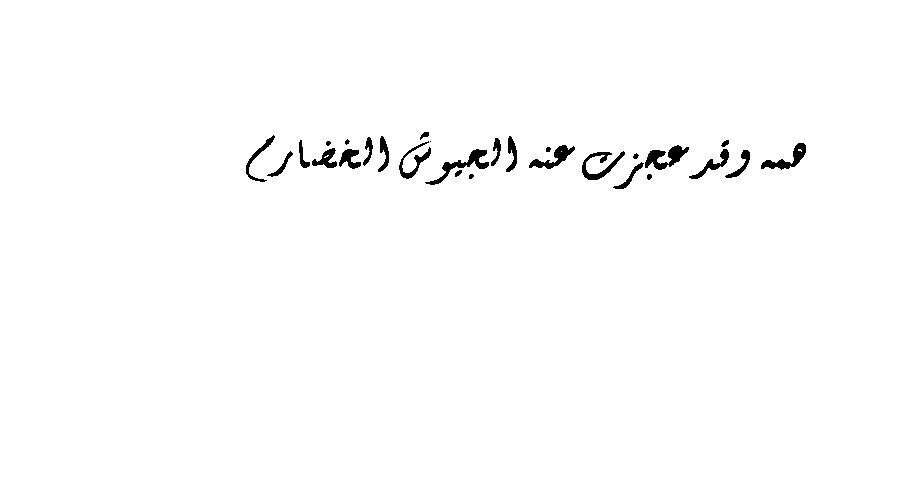

In [113]:
import pytesseract
from PIL import Image

image = Image.open('test/Diwani/5.tif')



print(pytesseract.image_to_string(image, lang='ara_fnt').strip())

image

العظائم يكلف سنيف الد واة الجيشش


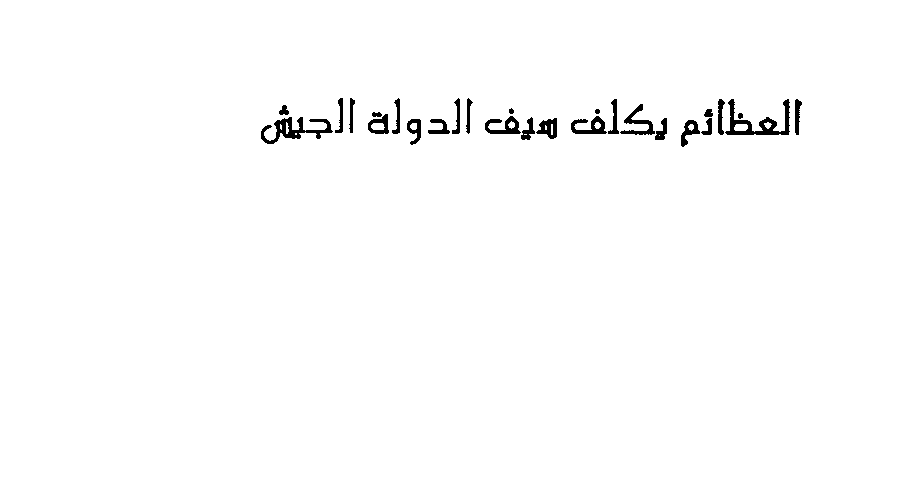

In [112]:
import pytesseract
from PIL import Image

image = Image.open('test/Kufic/4.tif')

print(pytesseract.image_to_string(image, lang='ara_fnt').strip())

image

على قدر اهل العرزم تاتي العزانئم


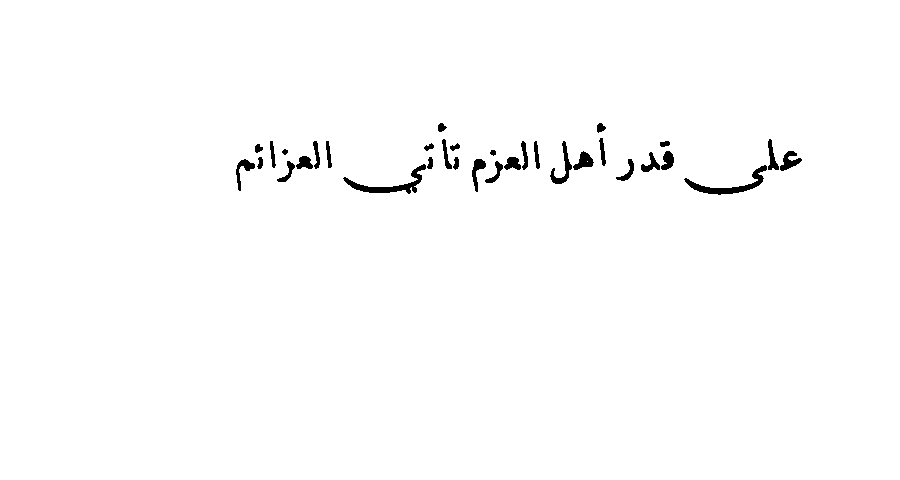

In [105]:
import pytesseract
from PIL import Image

image = Image.open('test/Naskh/0.tif')



print(pytesseract.image_to_string(image, lang='ara_fnt').strip())

image

بفدي أتم الطي عصرا سلاهحه


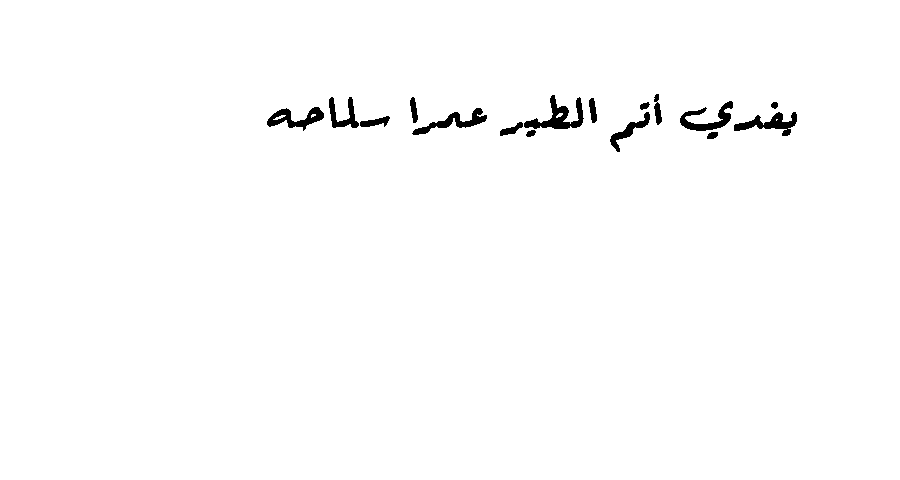

In [110]:
import pytesseract
from PIL import Image

image = Image.open('test/Ruqah/8.tif')

print(pytesseract.image_to_string(image, lang='ara_fnt').strip())

image

وتأتى على قدر الكرامالمكارم


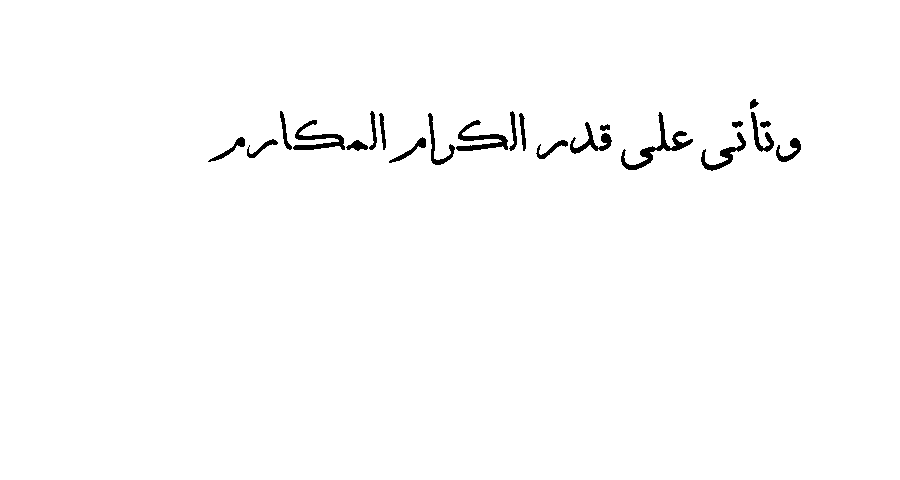

In [109]:
import pytesseract
from PIL import Image

image = Image.open('test/Thuluth/1.tif')

print(pytesseract.image_to_string(image, lang='ara_fnt').strip())

image